# <span style=color:navy> Project 2 - Video Games Sale and Rating</span>


*Pin-Jui Huang & Xiaochan Wu*

![alt text](https://images2.minutemediacdn.com/image/upload/c_crop,h_1190,w_2121,x_0,y_224/f_auto,q_auto,w_1100/v1562630330/shape/mentalfloss/65008-gettyimages-843648918.jpg)

## 1. Objective of the Proposed Research

Video gaming has a long history as far back, however, it was not reached to the mainstream popularity until the 1970s when video arcade was slowly introduced to the public. After the 1980s, video gaming has become a popular form of entertainment and a part of modern culture in most parts of the world. 

Nowadays, video games have become one of the major entertainments people enjoy. There are various types of games and different platforms for people to choose from. In the mean time, the competition in gaming industry have become more and more intense.

In order to help Coca Cola to find the best publisher for sponsoring. The purpose of this project is to explore the development of the video game industry from 1980-2017, and find market opportunities for new game. Our analysis will focus on publishers, game genres and the popularity of genres by region.

## 2. Data Exploration

In [37]:
import numpy as np
import pandas as pd
import os
!pip install plydata
from plydata import define, if_else

In [38]:
df = pd.read_csv("/Users/AshleaHuang/Desktop/VideoGame.csv")

#### <span style=color:gray> 1. Outputting first and last 5 of data </span>

Let's take a look of the dataset we are working on.

In [39]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
17406,Caladrius Blaze,PS3,2014.0,Shooter,Moss,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17407,Super Meat Boy,PS4,2016.0,Platform,Team Meat,0.0,0.0,0.00,0.0,0.01,85.0,7.0,7.0,114.0,T
17408,CSI: 3 Dimensions of Murder,PC,2006.0,Adventure,Ubisoft,0.0,0.0,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17409,theta,DS,2007.0,Puzzle,Nintendo,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17410,Nintama Rantarou: Nintama no Tame no Ninjutsu ...,DS,2009.0,Puzzle,Russel,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.0,0.0,0.00,0.0,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.0,0.0,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17415,Brian Lara 2007 Pressure Play,PSP,2007.0,Sports,Codemasters,0.0,0.0,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN


As you can see, these two tables show the paramenters of the information we need about this dataset.

#### <span style=color:gray> 2. Numbers of rows and colums of the data </span>

In [40]:
df.shape
print(df.shape)
print("The dataset has 17,416 rows and 15 columns")

(17416, 15)
The dataset has 17,416 rows and 15 columns


#### <span style=color:gray> 3. The type of the columns </span>

In [41]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Rating              object
dtype: object

These are the name of the columns we have in this dataset.

#### <span style=color:gray> 4. Summary of the dataset </span>

In [42]:
# Summary of each column
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,17416,12080,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,17416,31,DS,2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,17408,NaN,NaN,NaN,2006.63,5.9016,1976,2003,2008,2011,2017
Genre,17416,12,Action,3503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,17415,627,Electronic Arts,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,17416,NaN,NaN,NaN,0.254534,0.800673,0,0,0.07,0.23,41.36
EU_Sales,17416,NaN,NaN,NaN,0.140727,0.497341,0,0,0.02,0.1,28.96
JP_Sales,17416,NaN,NaN,NaN,0.0750195,0.303412,0,0,0,0.03,10.22
Other_Sales,17416,NaN,NaN,NaN,0.0459084,0.183932,0,0,0.01,0.03,10.57
Global_Sales,17416,NaN,NaN,NaN,0.516469,1.52612,0.01,0.05,0.16,0.45,82.54


This table shows the mean, max and min for this dataset.

## 3. Data Cleaning

Move on to data cleaning, we have to check every column for missing values.

In [43]:
df.isnull().any()

Name               False
Platform           False
Year_of_Release     True
Genre              False
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Rating              True
dtype: bool

For Year, Publisher and Rating, we will fill the null with the majority value <br>
For All the other numeric columns, we will replace the null with mean

In [44]:
# Count the frequency of Year
df['Year_of_Release'].value_counts().head(5)

2009.0    1550
2008.0    1536
2010.0    1331
2007.0    1262
2011.0    1215
Name: Year_of_Release, dtype: int64

In [45]:
# Replace Nan in Year_of_Release with 2009
df["Year_of_Release"].fillna(2009, inplace = True) 

In [46]:
# Count the frequency of Publisher
df['Publisher'].value_counts().head(5)

Electronic Arts                 1380
Activision                      1005
Namco Bandai Games               972
Ubisoft                          970
Konami Digital Entertainment     865
Name: Publisher, dtype: int64

In [47]:
# Replace Nan in publisher with Electronic Arts
df["Publisher"].fillna("Electronic Arts", inplace = True) 

In [48]:
# Count the frequency of Rating
df['Rating'].value_counts().head(5)

E       4120
T       3045
M       1599
E10+    1473
EC         8
Name: Rating, dtype: int64

In [49]:
# Since the missing value of Rating are too much, we have to replace by ratio.
r_count = df['Rating'].value_counts()

# Percent of current ratings
r_ratio = r_count/10252

# How many we need to replace
round(r_ratio * (17416/2)) # The reason to use 17416/2: 1) 17416/10252 round up to 2; 2) It's easy to create a series with a int ratio.

E       3500.0
T       2586.0
M       1358.0
E10+    1251.0
EC         7.0
K-A        3.0
RP         3.0
AO         1.0
Name: Rating, dtype: float64

In [50]:
# Replace missing values from Series in Pandas

x = np.array(["E", "T", "M", "E10+"])
L = np.repeat(x, [3500, 2586, 1358, 1264], axis=0)

r = round(len(df) / len(L))
print (r)

s = pd.Series(np.tile(np.array(L), r), index=df.index) # fillna can only pass scalar, number and series

print (s.head(5))
df['Rating'] = df['Rating'].fillna(s)


2
0    E
1    E
2    E
3    E
4    E
dtype: object


In [51]:
# Fill the Nans in Critic_Score, Critic_Count, User_Score, User_Count with mean
df["Critic_Score"].fillna(df["Critic_Score"].mean(), inplace = True)
df["Critic_Count"].fillna(df["Critic_Count"].mean(), inplace = True)
df["User_Score"].fillna(df["User_Score"].mean(), inplace = True)
df["User_Count"].fillna(df["User_Count"].mean(), inplace = True)

In [52]:
# View of cleaned dataset
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.000000,51.000000,8.000000,324.00000,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.912548,26.192059,7.117056,162.67248,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.000000,73.000000,8.300000,712.00000,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.000000,73.000000,8.000000,193.00000,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.912548,26.192059,7.117056,162.67248,E
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.912548,26.192059,7.117056,162.67248,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.000000,65.000000,8.500000,433.00000,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.600000,129.00000,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.000000,80.000000,8.400000,595.00000,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,68.912548,26.192059,7.117056,162.67248,E


In [53]:
# Information of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
Name               17416 non-null object
Platform           17416 non-null object
Year_of_Release    17416 non-null float64
Genre              17416 non-null object
Publisher          17416 non-null object
NA_Sales           17416 non-null float64
EU_Sales           17416 non-null float64
JP_Sales           17416 non-null float64
Other_Sales        17416 non-null float64
Global_Sales       17416 non-null float64
Critic_Score       17416 non-null float64
Critic_Count       17416 non-null float64
User_Score         17416 non-null float64
User_Count         17416 non-null float64
Rating             17416 non-null object
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [54]:
df.isnull().any()

Name               False
Platform           False
Year_of_Release    False
Genre              False
Publisher          False
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score         False
User_Count         False
Rating             False
dtype: bool

Now we have completed with cleaning the dataset.

## 4. Adaptation

We are going to add a column to specify the age limit of video games according to rating. 

In [55]:
# If the rating is still pending, we assign it to zero, along with Rating E for everyone.
def Rating_Age(df):
    if df["Rating"] == "T":
        return 13
    elif df["Rating"] == "M":
        return 17
    elif df["Rating"] == "E10+":
        return 10
    elif df["Rating"] == "EC":
        return 3
    elif df["Rating"] == "K-A":
        return 0
    elif df["Rating"] == "AO":
        return 18
    else:
        return 0

df = df.assign(Age_limit =df.apply(Rating_Age, axis=1))


df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Age_limit
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.000000,51.000000,8.000000,324.00000,E,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.912548,26.192059,7.117056,162.67248,E,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.000000,73.000000,8.300000,712.00000,E,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.000000,73.000000,8.000000,193.00000,E,0
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.912548,26.192059,7.117056,162.67248,E,0


For the next step, we add 3 columns to calculate the sales ratio in each region for each game.

In [56]:
df["pct_NA"] = round(df["NA_Sales"].divide(df["Global_Sales"]),2)
df["pct_EU"] = round(df["EU_Sales"].divide(df["Global_Sales"]),2)
df["pct_JP"] = round(df["JP_Sales"].divide(df["Global_Sales"]),2)
df["pct_Other"] = round(df["Other_Sales"].divide(df["Global_Sales"]),2)

df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Age_limit,pct_NA,pct_EU,pct_JP,pct_Other
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.000000,51.000000,8.000000,324.00000,E,0,0.50,0.35,0.05,0.10
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.912548,26.192059,7.117056,162.67248,E,0,0.72,0.09,0.17,0.02
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.000000,73.000000,8.300000,712.00000,E,0,0.44,0.36,0.11,0.09
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.000000,73.000000,8.000000,193.00000,E,0,0.48,0.33,0.10,0.09
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.912548,26.192059,7.117056,162.67248,E,0,0.36,0.28,0.33,0.03


In order to do cluster analysis, we converted the features into scales: Platform, Genre, Publisher

In [57]:
# Add a column to convert genre to scales

def genre_num(df):
    if df["Genre"] == "Action":
        return 1
    elif df["Genre"] == "Sports":
        return 2
    elif df["Genre"] == "Misc":
        return 3
    elif df["Genre"] == "Role-Playing":
        return 4
    elif df["Genre"] == "Adventure":
        return 5
    elif df["Genre"] == "Shooter":
        return 6
    elif df["Genre"] == "Racing":
        return 7
    elif df["Genre"] == "Simulation":
        return 8
    elif df["Genre"] == "Platform":
        return 9
    elif df["Genre"] == "Fighting":
        return 10
    elif df["Genre"] == "Strategy":
        return 11
    else:
        return 12

df = df.assign(Genre_coded =df.apply(genre_num, axis=1))

In [58]:
# Add a column to convert platform to scales

def platform_num(df):
    if df["Platform"] == "DS":
        return 1
    elif df["Platform"] == "PS2":
        return 2
    elif df["Platform"] == "PS3":
        return 3
    elif df["Platform"] == "Wii":
        return 4
    elif df["Platform"] == "PSP":
        return 5
    elif df["Platform"] == "X360":
        return 6
    elif df["Platform"] == "PS":
        return 7
    elif df["Platform"] == "PC":
        return 8
    elif df["Platform"] == "GBA":
        return 9
    elif df["Platform"] == "PS4":
        return 10
    else:
        return 11

df = df.assign(Platform_coded =df.apply(platform_num, axis=1))

In [59]:
# Since there are too many publishers, we chose the first 15 ones according to their global sales

df_pub = df.loc[:, ['Global_Sales', 'Publisher']]
df_pub.groupby(['Publisher']).agg(sum).sort_values('Global_Sales', ascending = False).head(15)

,Global_Sales
Publisher,
Nintendo,1803.00
Electronic Arts,1132.44
Activision,739.98
Sony Computer Entertainment,614.25
Ubisoft,477.30
Take-Two Interactive,408.69
THQ,345.51
Konami Digital Entertainment,286.01
Sega,272.19


In [60]:
# Add a column to convert publisher to numbers

def publisher_num(df):
    if df["Publisher"] == "Nintendo":
        return 1
    elif df["Publisher"] == "Electronic Arts":
        return 2
    elif df["Publisher"] == "Activision":
        return 3
    elif df["Publisher"] == "Sony Computer Entertainment":
        return 4
    elif df["Publisher"] == "Ubisoft":
        return 5
    elif df["Publisher"] == "Take-Two Interactive":
        return 6
    elif df["Publisher"] == "THQ":
        return 7
    elif df["Publisher"] == "Konami Digital Entertainment":
        return 8
    elif df["Publisher"] == "Sega":
        return 9
    elif df["Publisher"] == "Namco Bandai Games":
        return 10
    elif df["Publisher"] == "Microsoft Game Studios":
        return 11
    elif df["Publisher"] == "Capcom":
        return 12
    elif df["Publisher"] == "Atari":
        return 13
    elif df["Publisher"] == "Warner Bros. Interactive Entertainment	":
        return 14
    elif df["Publisher"] == "Square Enix":
        return 15
    else:
        return 16

df = df.assign(Publisher_coded =df.apply(publisher_num, axis=1))

In [61]:
def year_num(df):
    if df["Year_of_Release"] in range(1970,1980):
        return 1
    elif df["Year_of_Release"] in range(1980, 1990):
        return 2
    elif df["Year_of_Release"] in range(1990, 2000):
        return 3
    elif df["Year_of_Release"] in range(2000, 2009):
        return 4
    else:
        return 5

df = df.assign(ReleaseYear_coded =df.apply(year_num, axis=1))

In [62]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Rating,Age_limit,pct_NA,pct_EU,pct_JP,pct_Other,Genre_coded,Platform_coded,Publisher_coded,ReleaseYear_coded
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,...,E,0,0.50,0.35,0.05,0.10,2,4,1,4
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,E,0,0.72,0.09,0.17,0.02,9,11,1,2
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,...,E,0,0.44,0.36,0.11,0.09,7,4,1,4
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,...,E,0,0.48,0.33,0.10,0.09,2,4,1,5
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,E,0,0.36,0.28,0.33,0.03,4,11,1,3


## 5. Decriptive Static Visulization

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

First of all, let's look at the total number of sales each year.

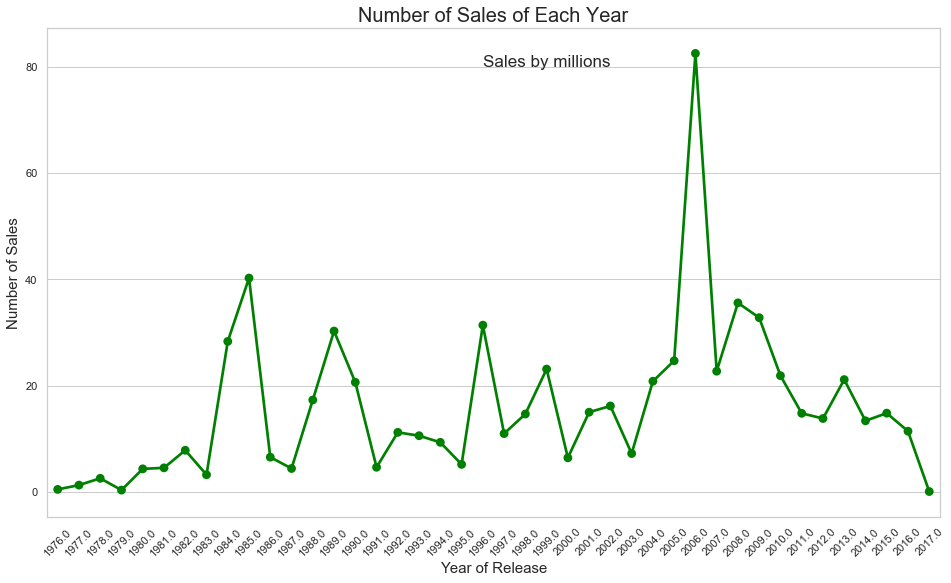

In [64]:
released_sales=df.groupby("Year_of_Release")["Global_Sales","Name"].max() 

sns.set(style="whitegrid")
f,ax=plt.subplots(figsize=(16,9))
sns.pointplot(x=released_sales.index,y=released_sales.Global_Sales,alpha=0.5,color="green")
plt.text(20,80, 'Sales by millions',fontsize = 17)
plt.xlabel('Year of Release',fontsize = 15)
plt.ylabel('Number of Sales',fontsize = 15)
plt.title('Number of Sales of Each Year',fontsize = 20)
plt.xticks(rotation= 45)
plt.show()

As seen, the highest peak of video game selling is around 2005, after that the number has been slowly delcine.

### Number of Sales by Genre

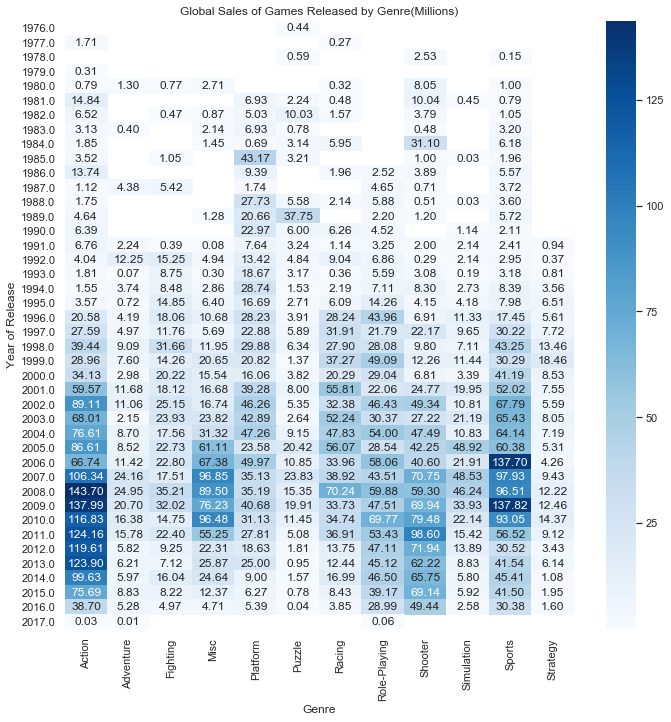

In [65]:
Gen_and_Yr = pd.pivot_table(df,index=['Year_of_Release'],
                    columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum)
Gen_and_Yr.columns = Gen_and_Yr.columns.get_level_values(1)
Yearly = Gen_and_Yr.sum(axis=1)
Yearly = Yearly.sort_index()
Yr_cumsum = Yearly.cumsum()/Yearly.sum()


plt.figure(figsize=(10,10))
sns.heatmap(Gen_and_Yr,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('Global Sales of Games Released by Genre(Millions)')
plt.show()

As you can see in the table above, we have created a heatmap that shows total number of sales by genre, it is obvious that the action type of games are the most popular.

In [66]:
labels = ['North America','Europe','Japan','Other']
values = [df['NA_Sales'].sum(),df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]


Now let's have a look of this barplot to see the percentage.

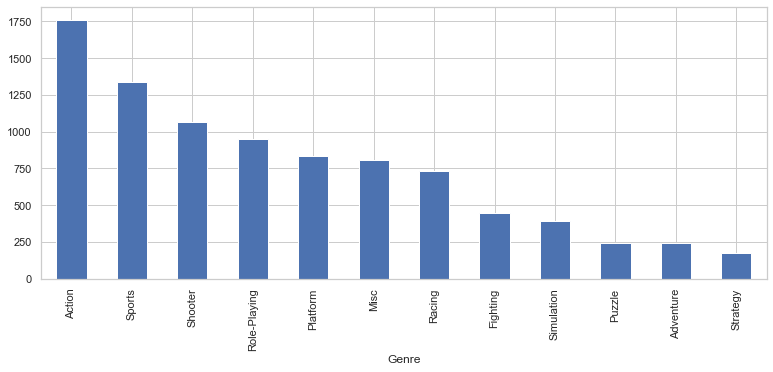

In [67]:
x = df.groupby(['Genre']).sum().copy()
ax2 = x.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));


After sorting out by barplot, you can see that the top3 are action, sports and shooters.

### Sales for each platform

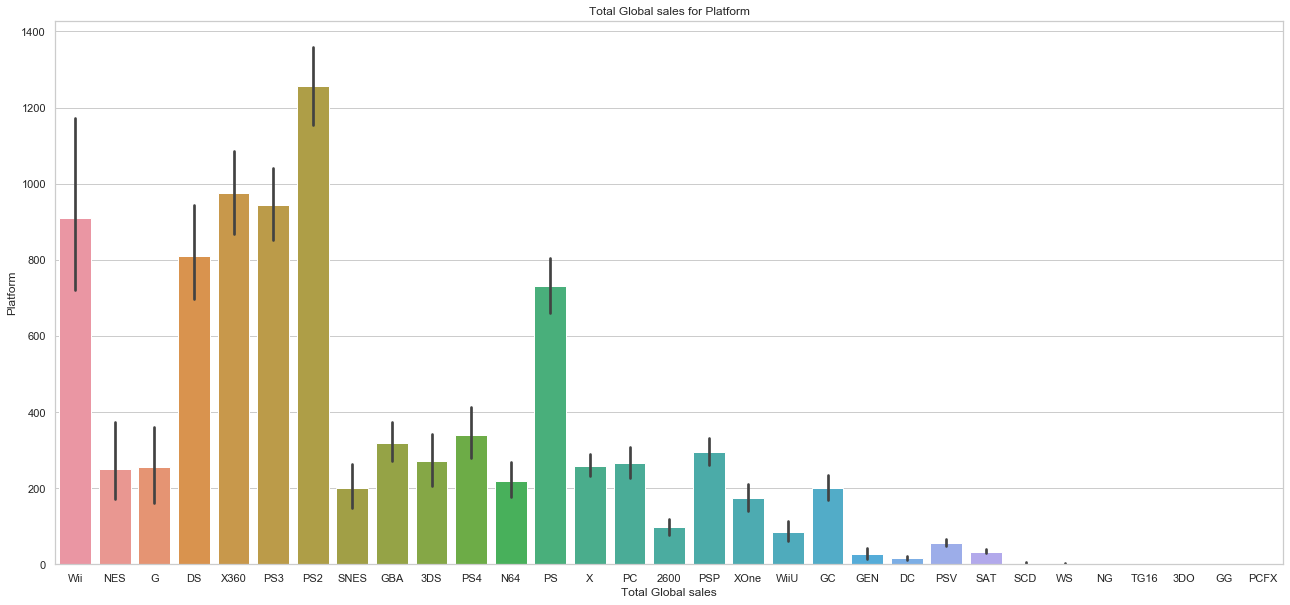

In [68]:
plt.figure(figsize=(22,10))

ax1 = sns.barplot(y = "Global_Sales", x = "Platform",data = df, estimator=sum)
ax1.set_title('Total Global sales for Platform')
ax1.set(xlabel='Total Global sales', ylabel='Platform')
plt.show()

This bar plot shows the total global sales for each platform, we can see that Playstations have pretty high sales, including all 4 of them - PS, PS2, PS3 and PS4.  

### Sales in Each Region

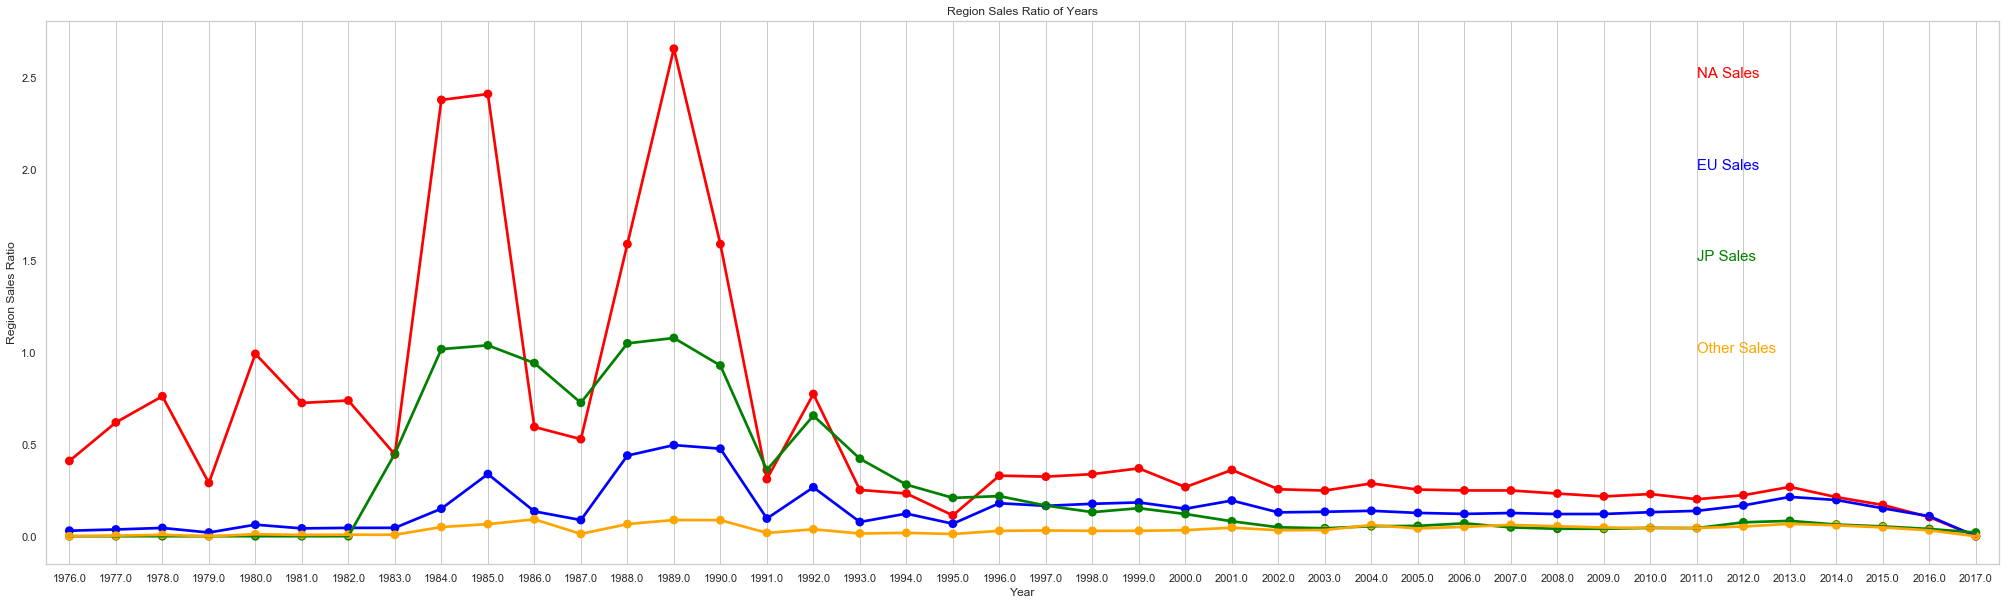

In [69]:
na_sales_ratio = []
eu_sales_ratio = []
jp_sales_ratio = []
other_sales_ratio = []
year_sales = list(df.Year_of_Release.unique())

for i in year_sales:
    x = df[df.Year_of_Release == i]
    na_sales = sum(x.NA_Sales)/len(x)
    na_sales_ratio.append(na_sales)
    eu_sales = sum(x.EU_Sales)/len(x)
    eu_sales_ratio.append(eu_sales)
    jp_sales = sum(x.JP_Sales)/len(x)
    jp_sales_ratio.append(jp_sales)
    other_sales = sum(x.Other_Sales)/len(x)
    other_sales_ratio.append(other_sales)
    
df1 = pd.DataFrame({"na_sales_ratio":na_sales_ratio, "eu_sales_ratio":eu_sales_ratio, "jp_sales_ratio":jp_sales_ratio,"other_sales_ratio":other_sales_ratio})

f,ax = plt.subplots(figsize=(35,10))
sns.pointplot(x=year_sales, y= df1.na_sales_ratio, color="red", ax=ax )
sns.pointplot(x=year_sales, y= df1.eu_sales_ratio, color="blue", ax=ax )
sns.pointplot(x=year_sales, y= df1.jp_sales_ratio, color="green", ax=ax )
sns.pointplot(x=year_sales, y= df1.other_sales_ratio, color="orange", ax=ax )

plt.text(35, 2.5, 'NA Sales', color='red', fontsize = 15)
plt.text(35, 2, 'EU Sales', color='blue', fontsize = 15)
plt.text(35, 1.5, 'JP Sales', color='green', fontsize = 15)
plt.text(35, 1, 'Other Sales', color='orange', fontsize = 15)
ax.set(xlabel="Year", ylabel = "Region Sales Ratio", title= "Region Sales Ratio of Years" )
plt.grid()

This point plot shows the sales ratio in each region per year, as you can see the major top sales regions are North American and Europe.

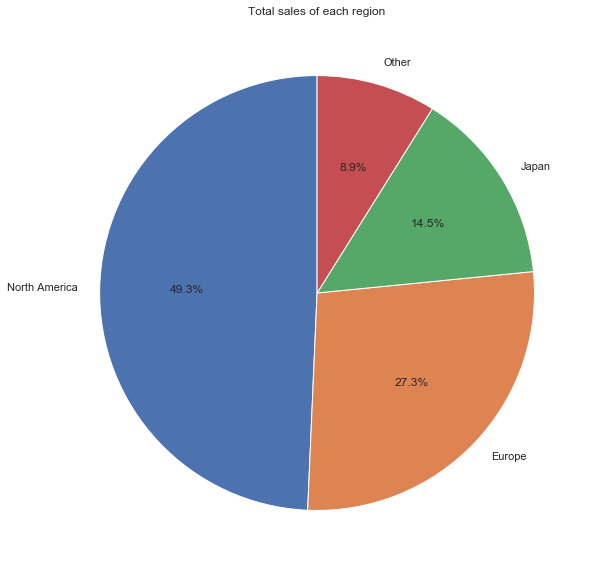

In [70]:
plt.figure(figsize=(10,10))
region_sales = [df['NA_Sales'].sum(), df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]
region = ['North America', 'Europe', 'Japan', 'Other']
plt.pie(region_sales, labels=region, startangle=90, autopct='%.1f%%')
plt.title('Total sales of each region')
plt.show()

We can see the percentage in the pie plot here. It seems like North America takes up half of the sales in the world.

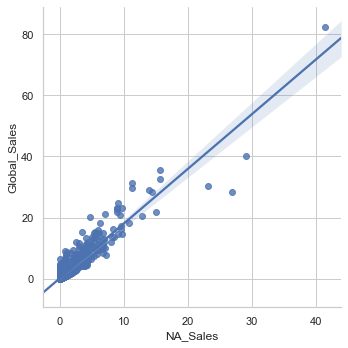

In [71]:
sns.lmplot(x="NA_Sales", y="Global_Sales", data=df)
plt.show()

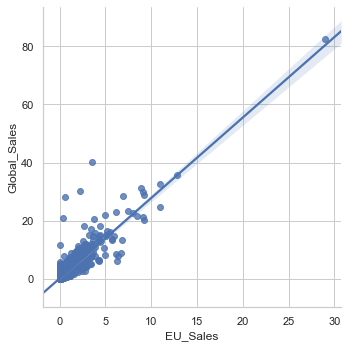

In [72]:
sns.lmplot(x="EU_Sales", y="Global_Sales", data=df)
plt.show()

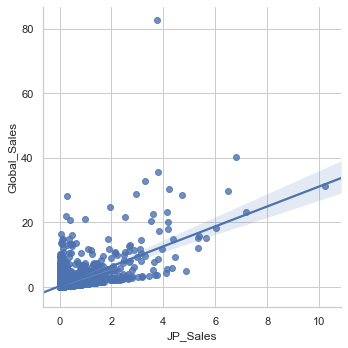

In [73]:
sns.lmplot(x="JP_Sales", y="Global_Sales", data=df)
plt.show()

This is the Lm plot that shows the comparison of sales in North America and Global.

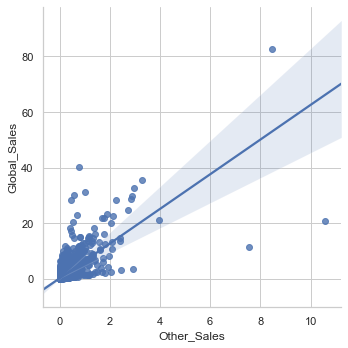

In [74]:
sns.lmplot(x="Other_Sales", y="Global_Sales", data=df)
plt.show()

## 6. Explore Correlations

First of all, we created a new dataframe containing all the variables we want to analyse

In [75]:
df1 = df.loc[:, ['NA_Sales','Global_Sales', 'Critic_Score', 'User_Score', 'Age_limit', 'Genre_coded','Platform_coded','Publisher_coded', 'ReleaseYear_coded']]
df1.head(5)

,NA_Sales,Global_Sales,Critic_Score,User_Score,Age_limit,Genre_coded,Platform_coded,Publisher_coded,ReleaseYear_coded
0,41.36,82.54,76.000000,8.000000,0,2,4,1,4
1,29.08,40.24,68.912548,7.117056,0,9,11,1,2
2,15.68,35.57,82.000000,8.300000,0,7,4,1,4
3,15.61,32.78,80.000000,8.000000,0,2,4,1,5
4,11.27,31.37,68.912548,7.117056,0,4,11,1,3


Correlation between the variables

In [76]:
df1.corr().round(2)

,NA_Sales,Global_Sales,Critic_Score,User_Score,Age_limit,Genre_coded,Platform_coded,Publisher_coded,ReleaseYear_coded
NA_Sales,1.00,0.94,0.19,0.07,-0.08,0.00,0.01,-0.21,-0.09
Global_Sales,0.94,1.00,0.20,0.07,-0.08,0.00,0.00,-0.21,-0.07
Critic_Score,0.19,0.20,1.00,0.50,0.04,0.01,0.07,-0.16,0.01
User_Score,0.07,0.07,0.50,1.00,0.03,0.03,0.01,-0.03,-0.11
Age_limit,-0.08,-0.08,0.04,0.03,1.00,-0.05,0.03,0.14,0.12
Genre_coded,0.00,0.00,0.01,0.03,-0.05,1.00,-0.00,0.06,-0.13
Platform_coded,0.01,0.00,0.07,0.01,0.03,-0.00,1.00,-0.02,-0.18
Publisher_coded,-0.21,-0.21,-0.16,-0.03,0.14,0.06,-0.02,1.00,0.05
ReleaseYear_coded,-0.09,-0.07,0.01,-0.11,0.12,-0.13,-0.18,0.05,1.00


Plot of correlations for the variables

Text(0.5, 1, 'Correlation matrix')

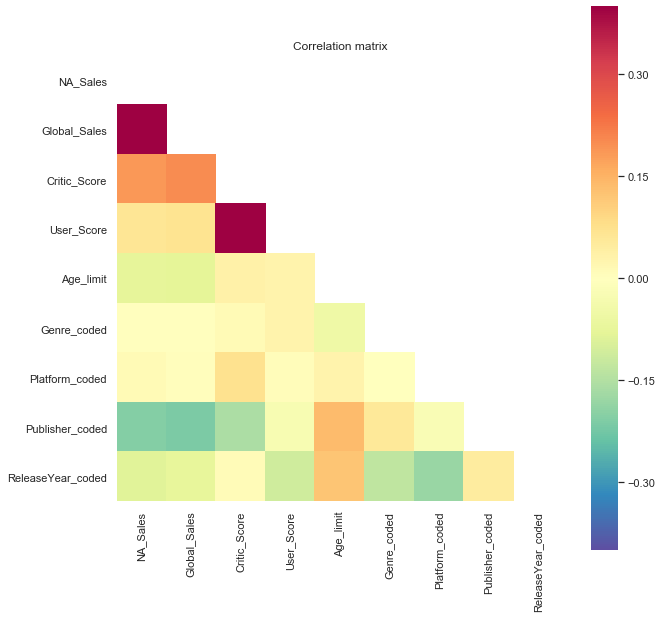

In [77]:
plt.figure(figsize=(10,10))

corrs = df1.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')


From the plot we can see that NA sales and global sales are strongly correlated. Two scores and the sales are also correlated. Since genre and platform are categorical data so the correlations are not very strong. 

## 7. Step-by-step hierarchical clustering

First of all, we created a new dataframe containing all the features

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [109]:
data_feature = df1.iloc[:,4:]
data_feature.head()

   Age_limit  Genre_coded  Platform_coded  Publisher_coded  ReleaseYear_coded
0          0            2               4                1                  4
1          0            9              11                1                  2
2          0            7               4                1                  4
3          0            2               4                1                  5
4          0            4              11                1                  3

Normalizing the data.

In [110]:
from sklearn.preprocessing import normalize
df_scaled = normalize(data_feature)
df_scaled = pd.DataFrame(df_scaled, columns=data_feature.columns)
df_scaled.head()

   Age_limit  Genre_coded  Platform_coded  Publisher_coded  ReleaseYear_coded
0        0.0     0.328798        0.657596         0.164399           0.657596
1        0.0     0.625543        0.764553         0.069505           0.139010
2        0.0     0.773021        0.441726         0.110432           0.441726
3        0.0     0.294884        0.589768         0.147442           0.737210
4        0.0     0.329914        0.907265         0.082479           0.247436

TypeError: 'dict' object is not callable

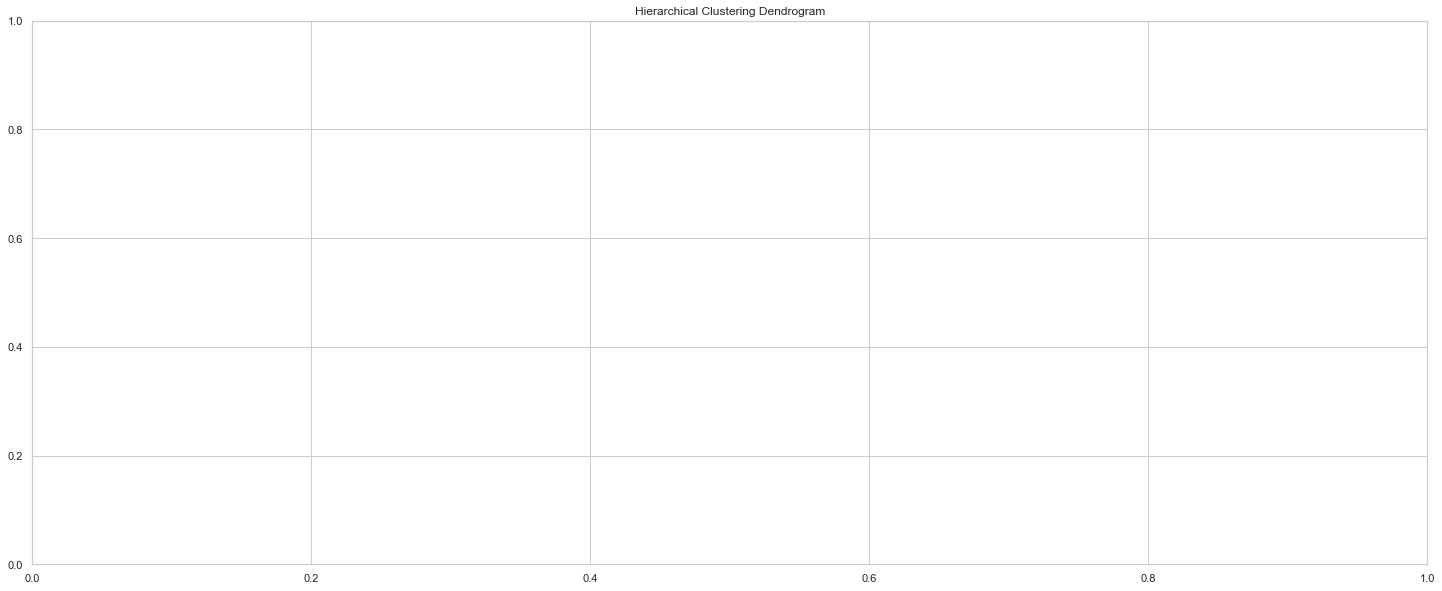

In [115]:
X = linkage(df_scaled, 'average')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(X, leaf_font_size = 20.)
plt.show()

## 8. Dendrogram

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from pandas import DataFrame

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

In [ ]:
# Calculate the distance
from sklearn.metrics.pairwise import euclidean_distances
pay_distance_df = DataFrame(euclidean_distances(df_feature))
pay_distance_df.astype(int)

In [91]:
Z = linkage(df1, 'average')

In [ ]:
# Plot dentrogram
Z = linkage(df1, 'average')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 20.)
plt.show()

## 9. Step-by-step K-means

In [58]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

### 1) Reduce Dimension

Since we want to show the plot for my result and we have three features right now. We will do a Dimensionality reduction with PCA.

First of all, scale the data

In [67]:
from sklearn.preprocessing import StandardScaler

#Setting up the standard scaler 

scale_data = StandardScaler()

#Scaling the data

scale_data.fit(df_feature)

df_feature_scaled = scale_data.transform(df_feature)

In [68]:
# import pca
from sklearn.decomposition import PCA

# Initialize a PCA model with 2 features 
pca = PCA(n_components=2)
# Fit the model to the dataframe
pca.fit(df_feature_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
# Transform the features
df_feature_2d = pca.transform(df_feature_scaled)

In [72]:
# Put the result in a new dataframe
df_ana = pd.DataFrame(df_feature_2d)
df_ana.index = df_feature.index
df_ana.columns = ['PC1','PC2']
df_ana.head()

        PC1       PC2
0  0.853049 -2.140350
1  4.190198  0.014286
2  1.352235 -1.590027
3 -0.089461 -2.466054
4  2.748502 -0.861741

### 2) K-means function

In [81]:
def kmeans(df, k):
    X = df.values
    r = X.shape[0]
    c = X.shape[1]
    n_iter = 100 #number of iterations
    
    # Random Centroids
    Centroids = np.array([]).reshape(c,0)
    for i in range(k):
        rand = np.random.randint(0, r-1)
        Centroids = np.c_[Centroids, X[rand]]
    
    #Euclidian distance from each point to centroids
    EuclidianDist = np.array([]).reshape(r,0)
    for j in range(k):
        tempDist = np.sum((X-Centroids[:, j])**2, axis = 1)
        EuclidianDist = np.c_[EuclidianDist, tempDist]
    # minimum distance and store the index of the column in vector C
    C = np.argmin(EuclidianDist, axis = 1)+1
    
    # Second iteration
    Y={} #Y is a temp dictionary which stores the solution for on particular iteration
    for j in range(k):
        Y [j+1] = np.array([]).reshape(2,0)
    for i in range(r):
        Y[C[i]] = np.c_[Y[C[i]], X[i]]
    
    for j in range(k):
        Y[j+1] = Y[j+1].T
        
    for j in range(k):
        Centroids[:, j] = np.mean(Y[j+1], axis = 0)
    
    # Further iteration (repeat previous steps)
    for i in range(n_iter):
        EuclidianDist = np.array([]).reshape(r,0)
        for j in range(k):
            tempDist = np.sum((X-Centroids[:, j])**2, axis = 1)
            EuclidianDist = np.c_[EuclidianDist, tempDist]
        C = np.argmin(EuclidianDist, axis = 1)+1
        
        Y={}
        for j in range(k):
            Y [j+1] = np.array([]).reshape(2,0)
        for i in range(r):
            Y[C[i]] = np.c_[Y[C[i]], X[i]]
            
        for j in range(k):
            Y[j+1] = Y[j+1].T
        
        for j in range(k):
            Centroids[:, j] = np.mean(Y[j+1], axis = 0)
        Output = Y
    
    #plot
    color=['red','blue','green','cyan','orange','black','pink']
    for j in range(k):
        plt.scatter(Output[j+1][:,0],Output[j+1][:,1],c=color[j])
    plt.scatter(Centroids[0,:],Centroids[1,:],marker = "*", s=300,c='yellow')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.show()
            

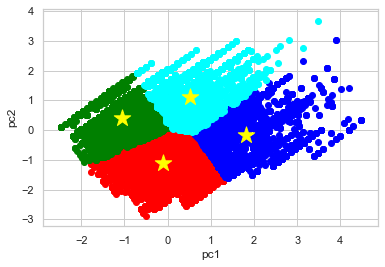

In [82]:
kmeans(df_ana, 4)

## 10. sklean.cluster

In [83]:
# K Means Cluster
model = KMeans(n_clusters=4)
kmeans = model.fit(df_ana)

In [84]:
model.labels_

array([1, 3, 3, ..., 2, 0, 0])

In [85]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.08527608  0.4404792 ]
 [-0.10967819 -1.08375572]
 [ 0.52398221  1.11182627]
 [ 1.82255812 -0.15766096]]


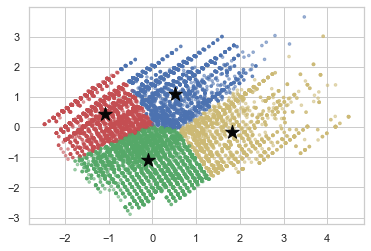

In [87]:
colors = np.array(['r', 'g', 'b', 'y', 'c', 'm'])
plt.scatter(df_ana['PC1'], df_ana['PC2'], c=colors[model.labels_], s=7, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

## 11. kNN function

**References**<br>
1. https://www.businessinsider.com/top-esports-sponsors-gaming-sponsorships-2018-1
1. https://www.sportsbusinessdaily.com/Journal/Issues/2018/05/28/In-Depth/Esports.aspx
1. https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
1. https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
1. https://stackoverflow.com/questions/49987853/replace-missing-value-with-n-a-for-multiple-columns-at-the-same-time
1. https://stackoverflow.com/questions/51779134/replace-missing-values-from-list-in-pandas
1. https://machinelearningmastery.com/handle-missing-data-python/
1. https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board
1. https://raphaelvallat.com/correlation.html

